In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')


In [6]:
# index 0 - 5000
df = pd.read_csv('hotel_bookings.csv.zip', nrows=5000)

print('DataFrame shape:', df.shape)

DataFrame shape: (5000, 32)


In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           5000 non-null   object 
 1   is_canceled                     5000 non-null   int64  
 2   lead_time                       5000 non-null   int64  
 3   arrival_date_year               5000 non-null   int64  
 4   arrival_date_month              5000 non-null   object 
 5   arrival_date_week_number        5000 non-null   int64  
 6   arrival_date_day_of_month       5000 non-null   int64  
 7   stays_in_weekend_nights         5000 non-null   int64  
 8   stays_in_week_nights            5000 non-null   int64  
 9   adults                          5000 non-null   int64  
 10  children                        5000 non-null   int64  
 11  babies                          5000 non-null   int64  
 12  meal                            50

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.000000,4186.000000,292.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.459600,75.163600,2015.252400,31.467200,15.46720,1.205600,3.308000,1.969800,0.115600,0.014800,0.0,0.0,0.0,0.207200,209.089107,241.544521,1.772000,87.557872,0.093800,0.602000
std,0.498415,63.428176,0.434433,14.027497,9.15225,1.194158,2.503196,1.566326,0.444833,0.122409,0.0,0.0,0.0,0.612489,81.397565,79.612602,13.545358,50.278574,0.292948,0.823245
min,0.000000,0.000000,2015.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,2015.000000,16.000000,7.00000,0.000000,1.750000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,175.000000,223.000000,0.000000,50.400000,0.000000,0.000000
50%,0.000000,63.000000,2015.000000,34.000000,15.00000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,254.000000,0.000000,73.390000,0.000000,0.000000
75%,1.000000,111.000000,2016.000000,43.000000,24.00000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,241.000000,281.000000,0.000000,117.815000,0.000000,1.000000
max,1.000000,737.000000,2016.000000,53.000000,31.00000,13.000000,33.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,387.000000,383.000000,122.000000,332.000000,2.000000,4.000000


# Data Cleaning & Preprocessing
There are 3 features NULL values
i think they don't have a strong relationship with target, so i won't use this features for prediction

In [10]:
null_features = df.columns[df.isna().any()]

null_df = df[null_features].isna().sum().rename('Total Missing Values').to_frame()
null_df['percentage'] = round(null_df['Total Missing Values'] / df.shape[0] * 100, 2)

null_df.sort_values('percentage', ascending=False)

,Total Missing Values,percentage
company,4708,94.16
agent,814,16.28
country,2,0.04


In [11]:
print('Duplicated rows in DataFrame:', df.duplicated().sum())

df.drop_duplicates(inplace=True)

Duplicated rows in DataFrame: 1162


# Feature Extraction

In [12]:
def family(dataset):
    if (dataset['adults'] > 0) & (dataset['children'] > 0):
        return 1
    elif (dataset['adults'] > 0) & (dataset['babies'] > 0):
        return 1
    else:
        return 0
    
df['is_family'] = df.apply(family, axis=1)

In [13]:
df['total_nights'] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

# EDA


In [14]:
cancel = df['is_canceled'].value_counts()[1]
no_cancel = df['is_canceled'].value_counts()[0]

print(f'TOTAL CANCEL : {cancel} |', f'TOTAL NO CANCEL : {no_cancel}')

TOTAL CANCEL : 1526 | TOTAL NO CANCEL : 2312


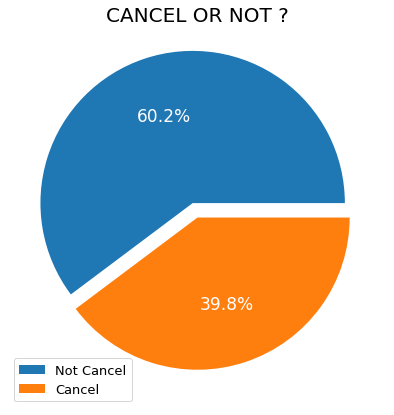

In [15]:
plt.figure(figsize = (8,7))
plt.title('CANCEL OR NOT ?', fontsize = 20)

labels = 'Not Cancel', 'Cancel'

plt.pie(df['is_canceled'].value_counts(), autopct = '%.1f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

Dari plot di atas kita dapat melihat bahwa dari total 5000 pesanan, ada 39% pesanan atau sekitar 1526 pesanan yang di cancel sehingga menyisakan 60.2% pesanan atau sekitar 2312 pesanan yang tidak di cancel.

In [17]:
df_ht = df.loc[:, df.dtypes == np.object]
df_ht = df_ht.drop(['hotel'], axis = 1)
df_ht.head()

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


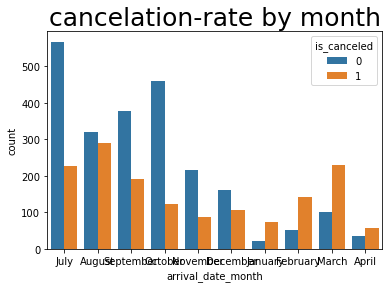

In [23]:
arrival_month = df.arrival_date_month.value_counts()

sns.countplot(x='arrival_date_month',
            hue='is_canceled',
            data=df).set_title('cancelation-rate by month', fontsize=25);

1.Most users canceled their hotel-booking on August
2.Cancelation-rate on September also quite high

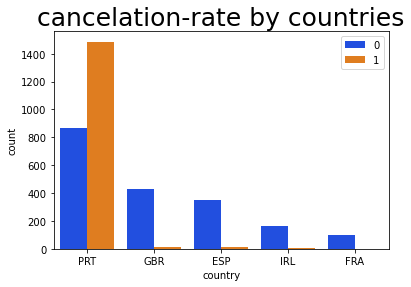

In [24]:
top_6_counties = (df['country'] == 'PRT') | (df['country'] == 'GBR') | (df['country'] == 'ESP') | (df['country'] == 'IRL') | (df['country'] == 'FRA')

df_top_6_countries = df[top_6_counties]

sns.countplot(x='country',
            hue='is_canceled',
            data=df_top_6_countries,
            palette='bright').set_title('cancelation-rate by countries', fontsize=25)

plt.legend(loc=1);

Interesting, cancelation-rate is very high for Portugal users, even their possibilities for canceled is higher than no-cancel

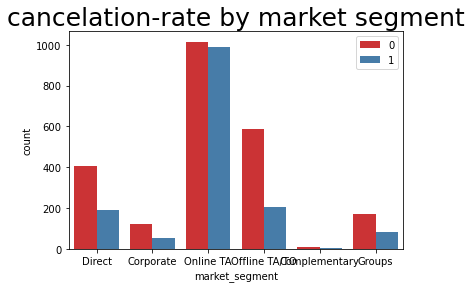

In [26]:
sns.countplot(x='market_segment',
            hue='is_canceled',
            data=df,
            palette='Set1').set_title('cancelation-rate by market segment', fontsize=25)

plt.legend(loc=1);

If the market segment is Online, the possibility of canceling is higher than others.

In [28]:
df_con = df.loc[:, df.dtypes != np.object]
df_con

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_nights,is_portuguese
0,0,342,2015,27,1,0,0,2,0,0,...,3,NaN,NaN,0,0.0,0,0,0,0,1
1,0,737,2015,27,1,0,0,2,0,0,...,4,NaN,NaN,0,0.0,0,0,0,0,1
2,0,7,2015,27,1,0,1,1,0,0,...,0,NaN,NaN,0,75.0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0,0,...,0,304.0,NaN,0,75.0,0,0,0,1,0
4,0,14,2015,27,1,0,2,2,0,0,...,0,240.0,NaN,0,98.0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,1,28,2016,16,11,1,4,2,0,0,...,0,240.0,NaN,0,65.0,0,0,0,5,0
4990,1,68,2016,16,11,1,4,1,0,0,...,0,240.0,NaN,0,49.0,0,0,0,5,1
4991,1,38,2016,16,11,1,4,1,0,0,...,0,240.0,NaN,0,77.0,0,0,0,5,0
4992,1,66,2016,16,11,1,4,2,0,0,...,0,240.0,NaN,0,68.0,0,0,0,5,1


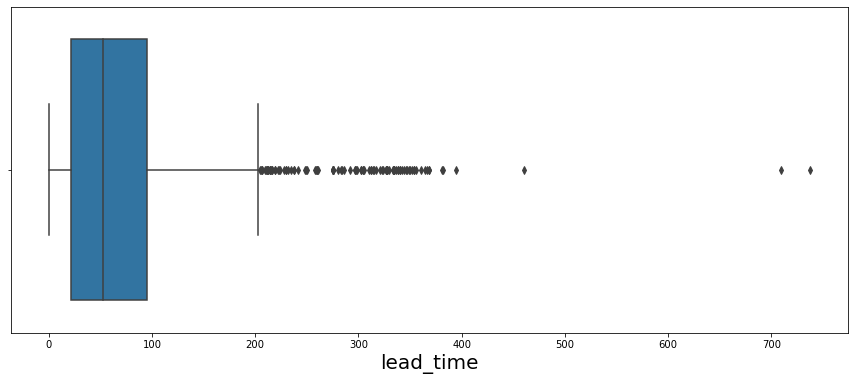

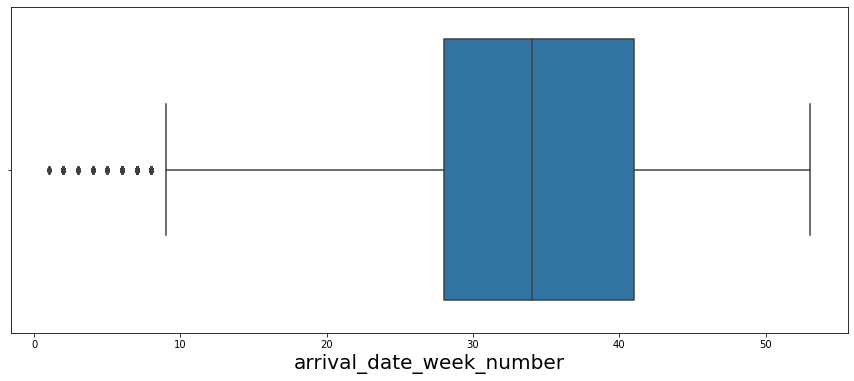

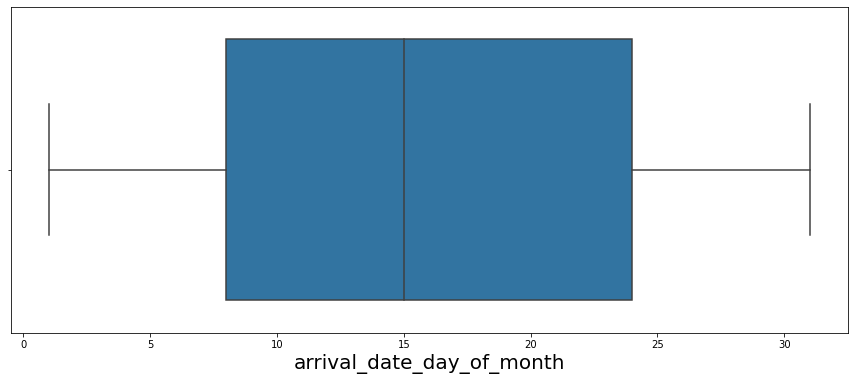

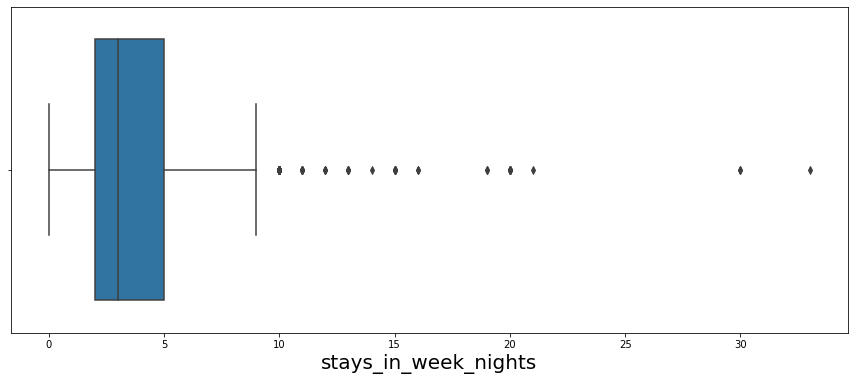

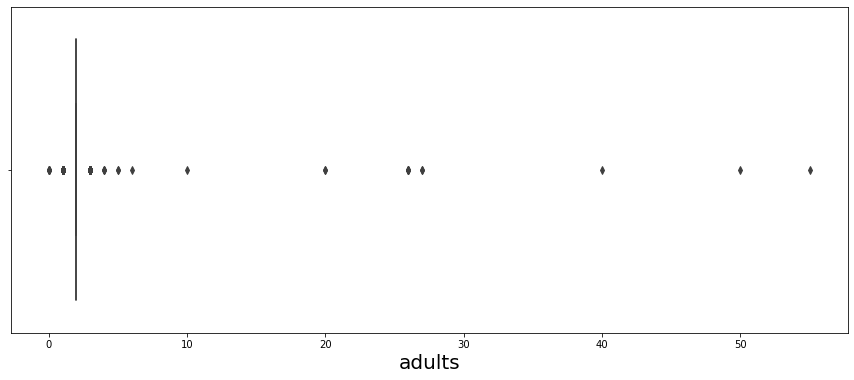

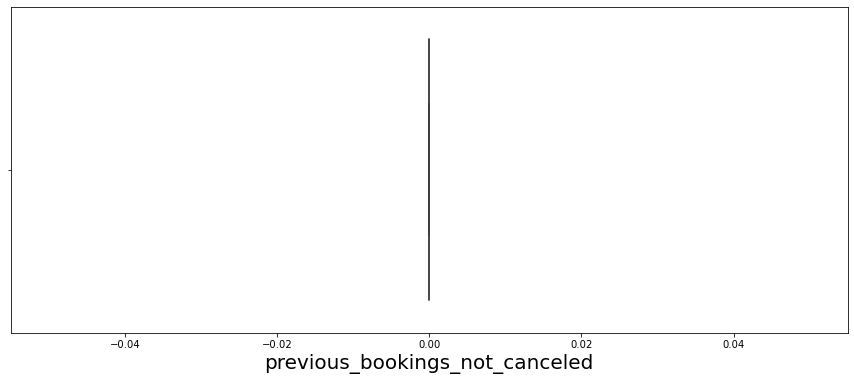

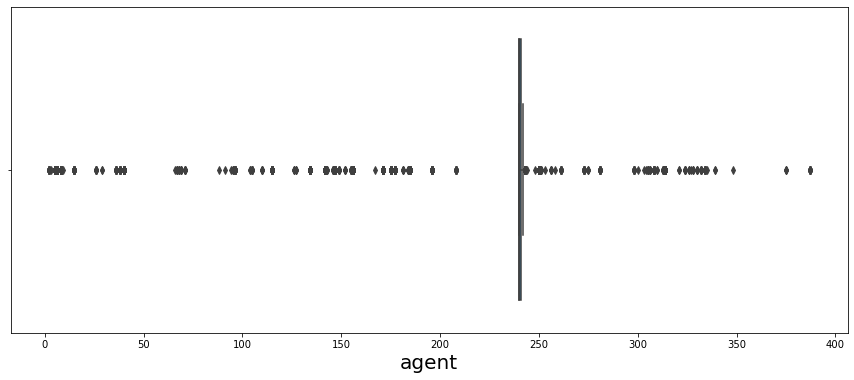

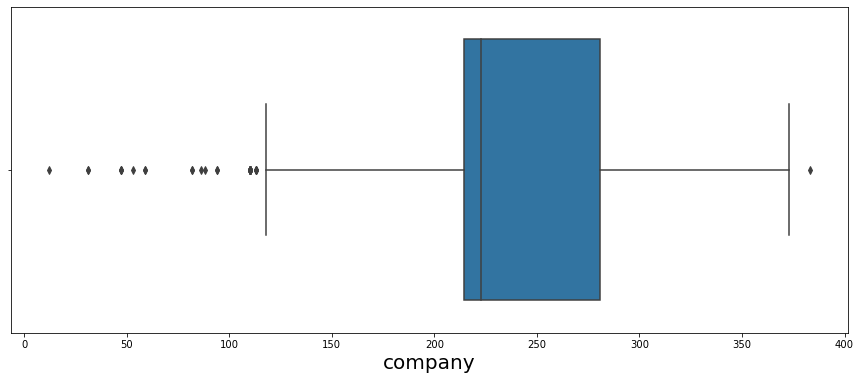

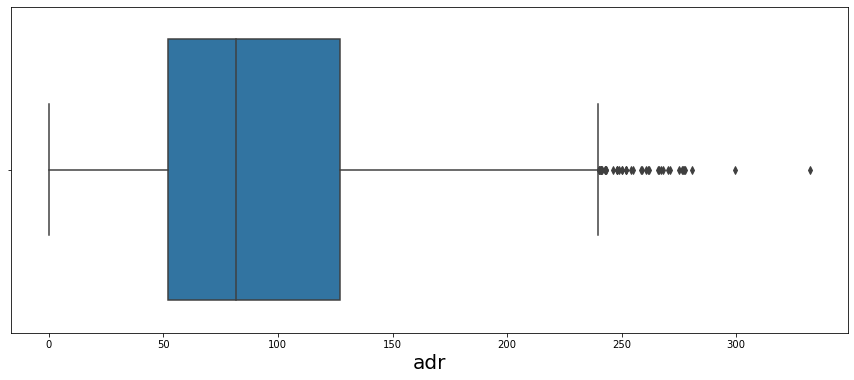

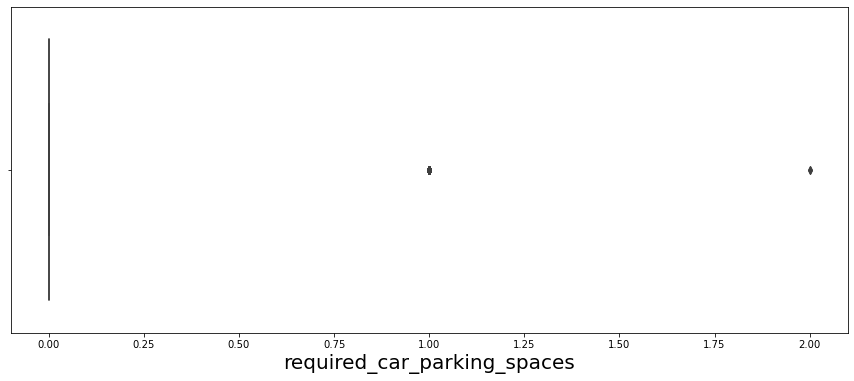

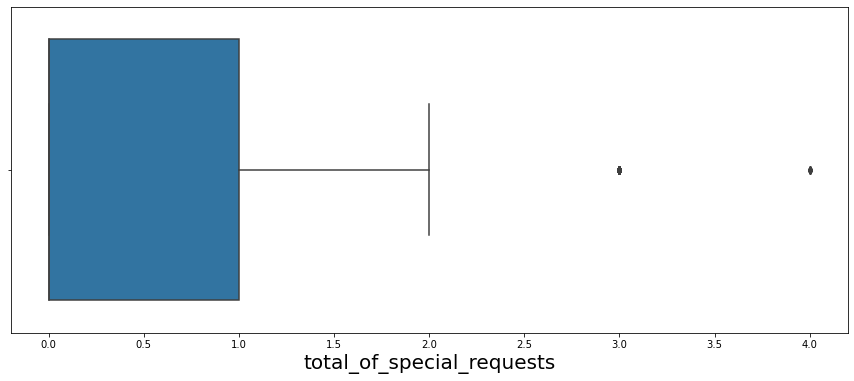

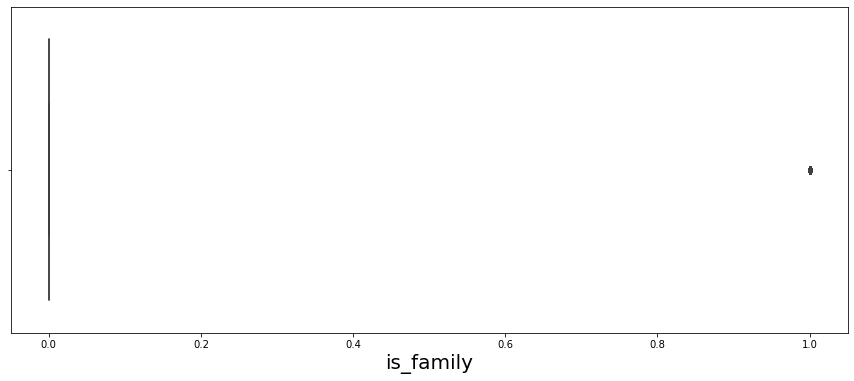

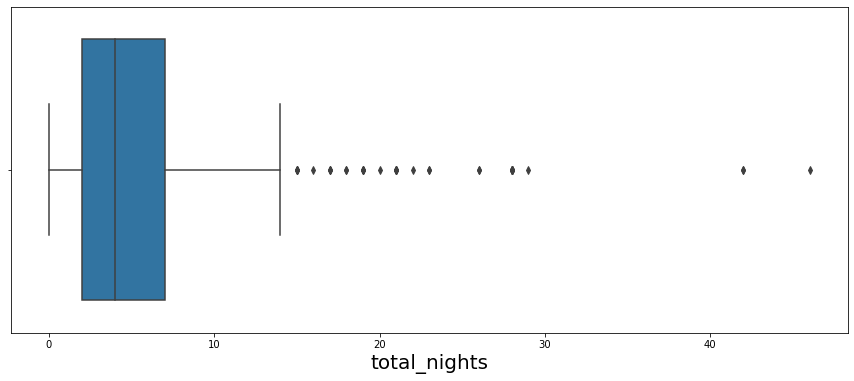

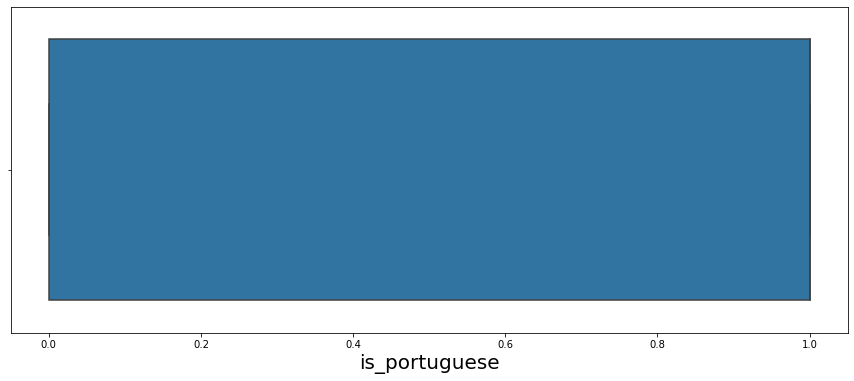

In [29]:
for col in df_con.drop(columns=['is_canceled', 'arrival_date_year', 'stays_in_weekend_nights', 'children', 'babies', 
                                'is_repeated_guest', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list']):
    plt.figure(figsize = (15,6))
    ax = sns.boxplot(x = col, data = df)
    
    plt.xlabel(col, fontsize = 20)    
    plt.show()

Berdasarkan boxplot, ditemukan beberapa variable yang memiliki rentang outlier atau nilai ekstrim yang cukup jauh.

In [38]:
final_df = df[['arrival_date_month', 'total_nights', 'is_portuguese', 'market_segment', 'customer_type', 'is_canceled']]

In [39]:
final_df = pd.get_dummies(final_df, columns=['arrival_date_month', 'market_segment', 'customer_type'])

final_df.head()

,total_nights,is_portuguese,is_canceled,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_March,...,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


# Model Building  

In [40]:
X = final_df.drop('is_canceled', axis=1)
y = final_df['is_canceled']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=2020)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.metrics import confusion_matrix, classification_report

In [46]:
from scipy.stats import randint

param_dist = {"max_depth": [3, 5, 7],
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

tree_cv = RandomizedSearchCV(rf, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BF0587A6A0>})

In [45]:
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}
Best score is 0.8237785016286645


# HYPER PARAMETER TUNING

In [51]:
rf = RandomForestClassifier(max_depth=7, n_estimators=7000, n_jobs=-1, random_state=2020)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=7000, n_jobs=-1,
                       random_state=2020)

In [52]:
cv_score = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=10)
print('Cross Validation Score:', cv_score.mean()

SyntaxError: unexpected EOF while parsing (<ipython-input-52-f9b6d3daeaba>, line 2)

In [53]:
y_pred = rf.predict(X_test)

# MODEL EVALUASI

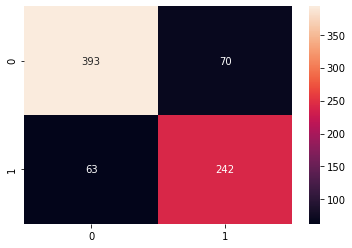

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       463
           1       0.78      0.79      0.78       305

    accuracy                           0.83       768
   macro avg       0.82      0.82      0.82       768
weighted avg       0.83      0.83      0.83       768



In [ ]:
# This model not quite able to recognize reservation cancelled
# Maybe because of class imbalance, or dataset is to small

# Final conclusion
Ada 2 jenis kesalahan yang mungkin terjadi dalam model ML di studi kasus ini, yaitu:

1. Model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan. - False Positive
2. Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan) - False Negative

-.Jenis kesalahan yang paling berpengaruh pada kerugian perusahaan adalah nomor 2 - False Negative
-.Alasannya karena pihak hotel sudah menyiapkan banyak hal untuk menyambut kedatangan user seperti merapikan kamar, makanan minuman bahkan menolak pengunjung lain yang memesan kamar yang telah dipesan
Tetapi akhirnya user tidak datang...